# Building Model

In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Loading data from stockroom

In [3]:
from stockroom import StockRoom

stock = StockRoom()
stock.data.keys()

 * Checking out COMMIT: a=a1839d98fe47f2e22404fc7ddbe6bcdf0d83722f


('cifar10-test-image',
 'cifar10-test-label',
 'cifar10-train-image',
 'cifar10-train-label')

In [4]:
imgcol = stock.data['cifar10-train-image']
lblcol = stock.data['cifar10-train-label']

In [5]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

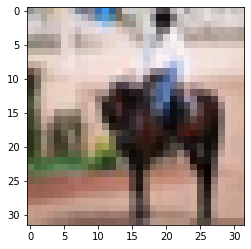

In [6]:
imshow(imgcol[11])

# DataLoader from stockroom

In [8]:
from stockroom import make_torch_dataset
from torch.utils.data import DataLoader


lr = 0.001
momentum = 0.9
check_every = 50
net = Net()
dset = make_torch_dataset([imgcol, lblcol])
dloader = DataLoader(dset, batch_size=512)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

# Training, model storage and experiment storage

In [9]:
from tqdm import tqdm


for epoch in range(1):
    running_loss = 0.0
    current_loss = 99999
    best_loss = 99999
    p = tqdm(dloader)
    p.set_description('[epcoh: %d, iteration: %d] loss: %5d' %(epoch + 1, 1, current_loss))
    for i, data in enumerate(p):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % check_every == check_every - 1:
            current_loss = running_loss / check_every
            running_loss = 0.0
            p.set_description('[epcoh: %d, iteration: %d] loss: %.6f' %(epoch + 1, i + 1, current_loss))
            if current_loss < best_loss:
                commit_msg = f"Experiment with better result. Loss={best_loss}"
                with stock.enable_write(commit_msg=commit_msg):
                    stock.experiment['lr'] = lr
                    stock.experiment['momentum'] = momentum
                    stock.model['cifarmodel'] = net.state_dict()
                best_loss = current_loss

[epcoh: 1, iteration: 50] loss: 2.304749:  50%|█████     | 49/98 [00:06<00:06,  7.31it/s]


 Neither BRANCH or COMMIT specified.
 * Checking out writing HEAD BRANCH: master


[epcoh: 1, iteration: 50] loss: 2.304749: 100%|██████████| 98/98 [00:18<00:00,  5.38it/s]


In [10]:
stock.model.keys()

('cifarmodel',)

In [11]:
stock.model['cifarmodel']

{'conv1.weight': tensor([[[[-0.1126, -0.0677,  0.0757,  0.0012, -0.0725],
           [-0.0177, -0.1103,  0.0600, -0.0875,  0.0257],
           [ 0.1029,  0.0253, -0.0711,  0.0470, -0.0714],
           [-0.0044,  0.0204, -0.0047,  0.0946,  0.0754],
           [ 0.0826, -0.0661,  0.0513, -0.0409, -0.1134]],
 
          [[ 0.0505,  0.0172,  0.0411,  0.0086, -0.0303],
           [-0.0430,  0.0861,  0.0815, -0.1049, -0.0260],
           [ 0.0561, -0.0987, -0.0892,  0.0161,  0.0110],
           [-0.0195,  0.0364,  0.0719,  0.0071,  0.0210],
           [-0.1049, -0.0405, -0.1104, -0.0387, -0.0901]],
 
          [[-0.0627,  0.1066, -0.0480,  0.1037, -0.0735],
           [-0.1146,  0.0265, -0.1083,  0.0650,  0.0017],
           [-0.1053, -0.0455,  0.0727, -0.0238,  0.1107],
           [-0.0605,  0.1128, -0.0581,  0.1043, -0.0790],
           [-0.0946, -0.0793,  0.0637,  0.0040, -0.0466]]],
 
 
         [[[-0.0871, -0.0463, -0.0516, -0.0924, -0.0721],
           [-0.0533, -0.0558, -0.0203,  0.09

In [ ]:
stock.model.keys()